In [23]:
%load_ext autoreload 
%autoreload 2

import os
import random
import numpy as np
import scipy.linalg as sl
from PIL import Image
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from IPython import display

import torch
from torch import nn, distributions as dist, autograd
from torch.func import jacfwd
from torch.nn import functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, Resize, CenterCrop, RandomHorizontalFlip, RandomVerticalFlip, ToTensor, Normalize
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
# torch.set_default_device("cuda")
torch.set_default_dtype(torch.float32)
plt.style.use('seaborn-v0_8')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:

DATASET_PATH = "/mnt/dl/datasets/Oxford102FlowersSplits/"
os.environ["KERAS_BACKEND"] = "tensorflow"
LABELS = {i: k.strip() for i, k in enumerate(open(os.path.join(DATASET_PATH, "names.txt")))}
img_size = 64
batch_size = 32
num_classes = len(LABELS)
patch_size = 16
num_patches = img_size ** 2 / patch_size **2

In [3]:
class FlowerDataset(Dataset):
    def __init__(self, path, split, cache=True, transforms=None):
        super().__init__()
        self.load_data(path, split)
        self.samples = dict()
        self.transforms = transforms
        
    def load_data(self, path, split):
        path = os.path.join(path, split, )
        img_files = os.listdir(os.path.join(path, "jpeg"))
        img_files = sorted(img_files, key=lambda x: int(x.replace(".jpeg", "")))
        img_files = list(img_files)
        
        labels = list(open(os.path.join(path, "label", "label.txt"),))
        self.labels = [int(l.strip()) for l in labels]
        
        self.img_files = [os.path.join(path, "jpeg", name) for name in img_files]
    
    def __len__(self):
        return len(self.img_files)
    
    def __getitem__(self, index):
        if index not in self.samples:
            self.load_sample(index)
        sample = self.samples[index]
        if self.transforms is not None:
            sample = self.transforms(sample)

        return sample
        
    def load_sample(self, idx):
        img = Image.open(self.img_files[idx])
        img = np.array(img).astype(np.float32)
        self.samples[idx] = img
        return True


In [4]:
train_ds = FlowerDataset(DATASET_PATH, "train", transforms=Compose([
    ToTensor(),
    Resize((img_size, img_size)),
    RandomHorizontalFlip(0.1),
    RandomVerticalFlip(0.),
]))
val_ds = FlowerDataset(DATASET_PATH, "validation", transforms=Compose([
    ToTensor(),
    Resize((img_size, img_size)),
]))

test_ds = FlowerDataset(DATASET_PATH, "test", transforms=Compose([
    ToTensor(),
    Resize((img_size, img_size)),
]))

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size=16, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=16)

In [5]:
img = train_ds[0].unsqueeze(0)

/env_dl/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [9]:
# x Categorical ex 9
x = torch.tensor(9) 

In [10]:
# u uniform
u = torch.empty((1000,)).uniform_(0, 1)

In [19]:
# v = Uniform(x, x+1)
v = x + u

(0.0, 1.5)

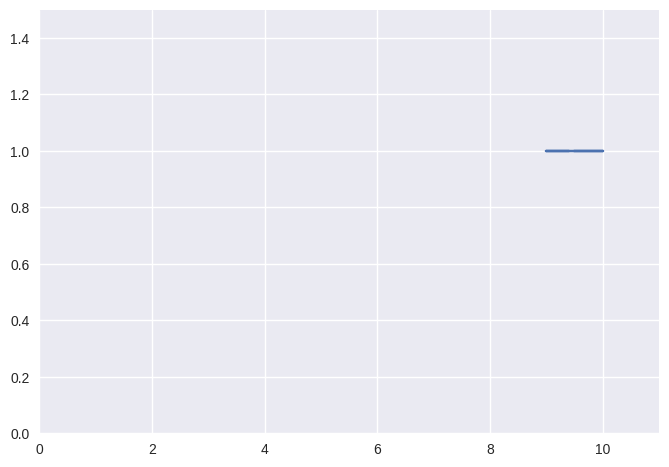

In [20]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(v, torch.ones_like(v))
ax.set_xlim(xmin=0.0, xmax=11.)
ax.set_ylim(ymin=0.0, ymax=1.5)

In [21]:
def inverse_sigmoid(x):
    return x.log() - (1-x).log()


In [26]:
z = inverse_sigmoid(v)

In [27]:
zjac= torch.func.jacfwd(inverse_sigmoid,)(v)

In [32]:
zjac_det = torch.linalg.det(zjac).to(torch.float64).abs()
zjac_det

tensor(0., dtype=torch.float64)

In [33]:
torch.prod(zjac.diag())

tensor(0.)

In [ ]:
1 / v()